In [1]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import scipy.sparse as sparse

data2012 = pd.read_csv('/home/peter/Documents/DSProject/finalData2012.csv')
data2013 = pd.read_csv('/home/peter/Documents/DSProject/finalData2013.csv')
data2014 = pd.read_csv('/home/peter/Documents/DSProject/finalData2014.csv')

data = pd.read_csv('/home/peter/Documents/DSProject/Data00-13.csv')
data14 = pd.read_csv('/home/peter/Documents/DSProject/Data14-14.csv')

In [2]:
data = pd.concat([data2012, data2013], axis=0)

In [3]:
Uta14 = data['State'] == 'Utah'
Utah14 = data[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

In [4]:
Uta14 = data14['State'] == 'Utah'
Utah14 = data14[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
da = Utah14

In [5]:
da

Date Local   NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
0    2014-01-21  41.909091               47.0              17.0     44.0   
1    2014-01-22  43.000000               58.0              11.0     55.0   
2    2014-01-23  33.416667               45.0              19.0     42.0   
3    2014-01-24  37.250000               45.0               8.0     42.0   
4    2014-01-25  36.166667               42.0              17.0     40.0   
..          ...        ...                ...               ...      ...   
309  2014-12-27  24.708333               39.0               7.0     37.0   
310  2014-12-28  24.416667               41.0               1.0     39.0   
311  2014-12-29  13.791667               39.0               7.0     37.0   
312  2014-12-30   2.875000                4.0               7.0      4.0   
313  2014-12-31  22.583333               49.0               8.0     46.0   

      O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  SO2 Mean  \
0    0.003875             0.011              9.0    10.0  1.645031   
1    0.002833             0.008              9.0     7.0  2.137500   
2    0.007333             0.021             10.0    19.0  1.416666   
3    0.005417             0.015              9.0    14.0  1.385417   
4    0.006917             0.018              9.0    17.0  1.406250   
..        ...               ...              ...     ...       ...   
309  0.012792             0.026              9.0    24.0  0.000000   
310  0.019667             0.029             10.0    27.0  0.000000   
311  0.023958             0.030             11.0    28.0  0.020833   
312  0.031625             0.036             21.0    33.0  0.127083   
313  0.019053             0.031              0.0    29.0  0.502084   

     SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI   CO Mean  CO 1st Max Value  \
0                 2.55              12.0     3.02  1.188134             2.310   
1                 5.25              10.5     6.02  1.071458             1.935   
2                 2.50               2.0     3.02  0.632008             1.035   
3                 2.00              11.0     3.02  0.906629             1.880   
4                 2.35              15.5     3.02  0.849924             1.320   
..                 ...               ...      ...       ...               ...   
309               0.00               1.0     1.52  0.375113             0.575   
310               0.00               1.0     1.52  0.368541             0.540   
311               0.20              16.5     1.52  0.285795             0.440   
312               0.35              11.0     1.52  0.177292             0.200   
313               3.45              10.0     4.52  0.458125             1.175   

     CO 1st Max Hour  CO AQI  
0               10.0   11.62  
1                8.5   10.62  
2               10.0    6.62  
3                8.0    9.62  
4               13.0    9.12  
..               ...     ...  
309             15.5    5.12  
310              0.0    5.12  
311              3.5    4.62  
312              0.0    3.12  
313             15.5    6.62  

[314 rows x 17 columns]

In [6]:
pd.DatetimeIndex(da['Date Local'])
date = da['Date Local']
N02 = da['NO2 AQI']
da = pd.DataFrame({'time': date, 'NO2AQI': N02})
da.time = pd.to_datetime(da.time)

In [7]:
da['time'] = pd.to_datetime(da['time'])
da['time']=da['time'].map(dt.datetime.toordinal)

In [8]:
a = da.iloc[:,0:1]

In [9]:
a

time
0    735254
1    735255
2    735256
3    735257
4    735258
..      ...
309  735594
310  735595
311  735596
312  735597
313  735598

[314 rows x 1 columns]

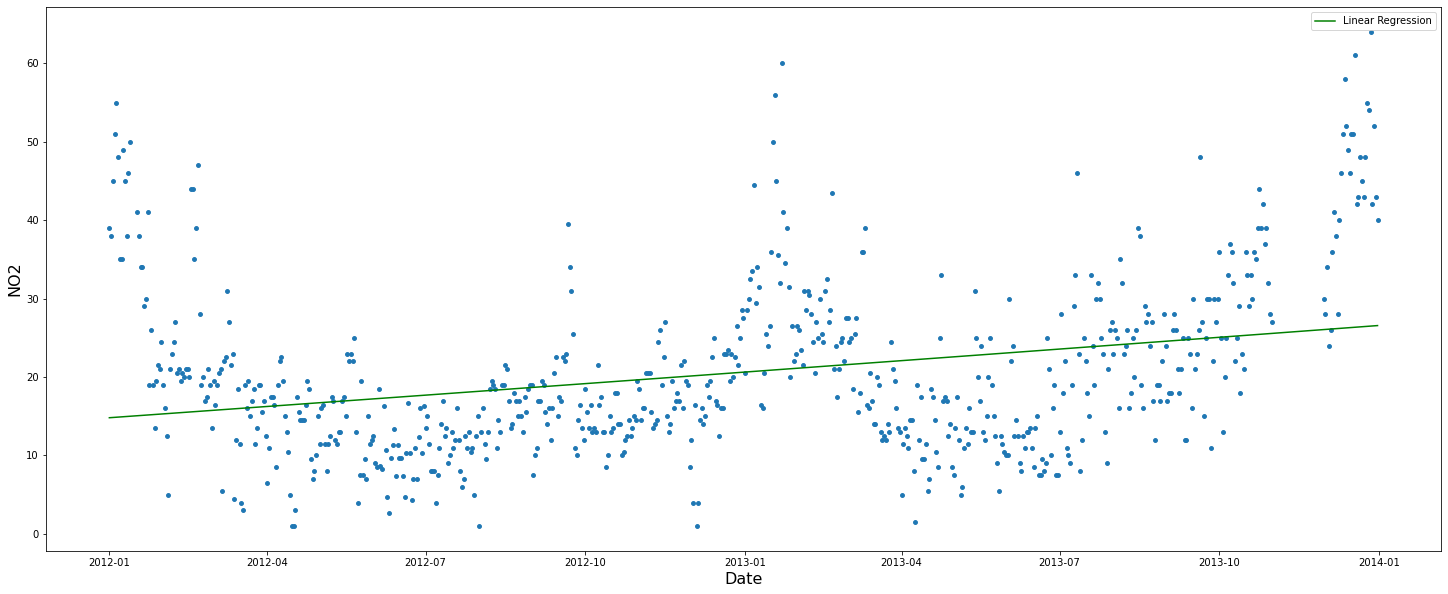

In [10]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
Odate = UtahDaily2014['Date Local']
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02, 'Date' : Odate})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [11]:
UtahDaily2014

time  NO2AQI        Date
0   2012-01-01    39.0  2012-01-01
1   2012-01-02    38.0  2012-01-02
2   2012-01-03    45.0  2012-01-03
3   2012-01-04    51.0  2012-01-04
4   2012-01-05    55.0  2012-01-05
..         ...     ...         ...
694 2013-12-27    64.0  2013-12-27
695 2013-12-28    42.0  2013-12-28
696 2013-12-29    52.0  2013-12-29
697 2013-12-30    43.0  2013-12-30
698 2013-12-31    40.0  2013-12-31

[699 rows x 3 columns]

In [12]:
UtahDaily2014['time'] = pd.to_datetime(UtahDaily2014['time'])
UtahDaily2014['time']=UtahDaily2014['time'].map(dt.datetime.toordinal)

In [62]:
polly = PolynomialFeatures(degree=1)

In [63]:
x = UtahDaily2014.iloc[:,0:1]
y = UtahDaily2014.iloc[:,1:2]

In [64]:
lin_regs = LinearRegression()

In [65]:
lin_regs.fit(x,y)

LinearRegression()

In [75]:
poly_regs = PolynomialFeatures(degree=10)

In [76]:
x_poly = poly_regs.fit_transform(x)

In [77]:
lin_reg_2 = LinearRegression()

In [78]:
lin_reg_2.fit(x_poly,y)

LinearRegression()

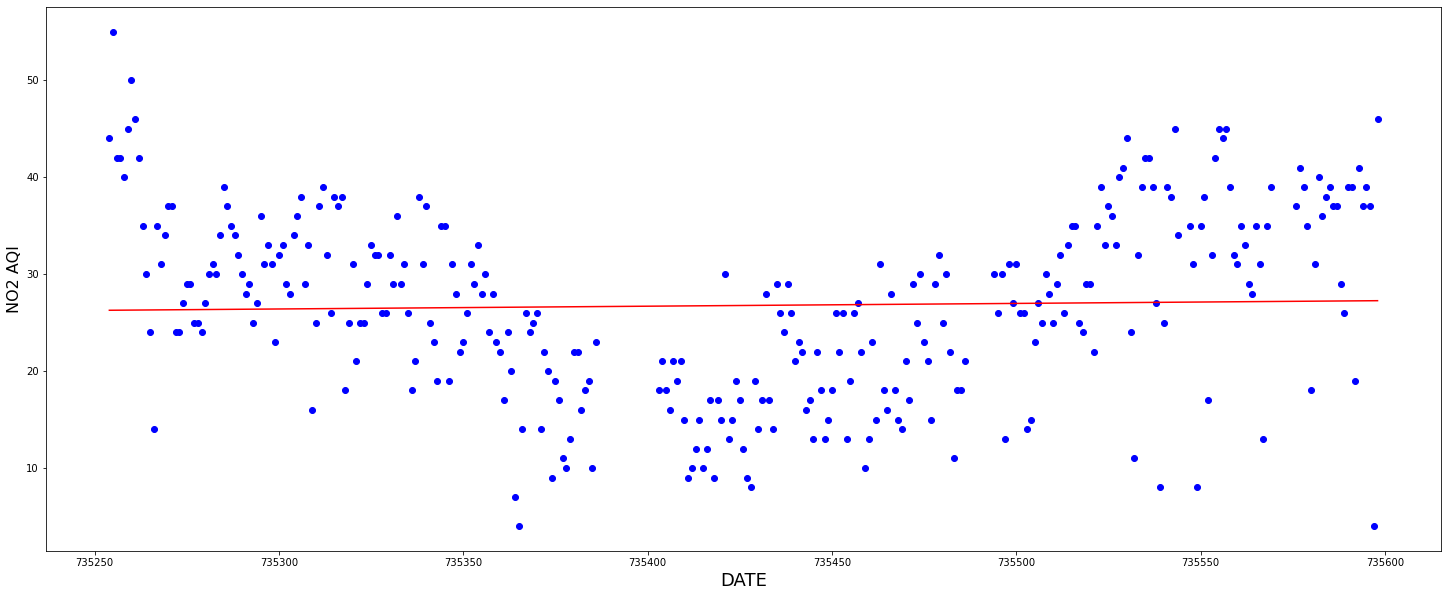

In [79]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.plot(x,lin_regs.predict(x),color="red")
plt.xlabel('DATE', fontsize=18)
plt.ylabel('NO2 AQI', fontsize=16)
plt.show()

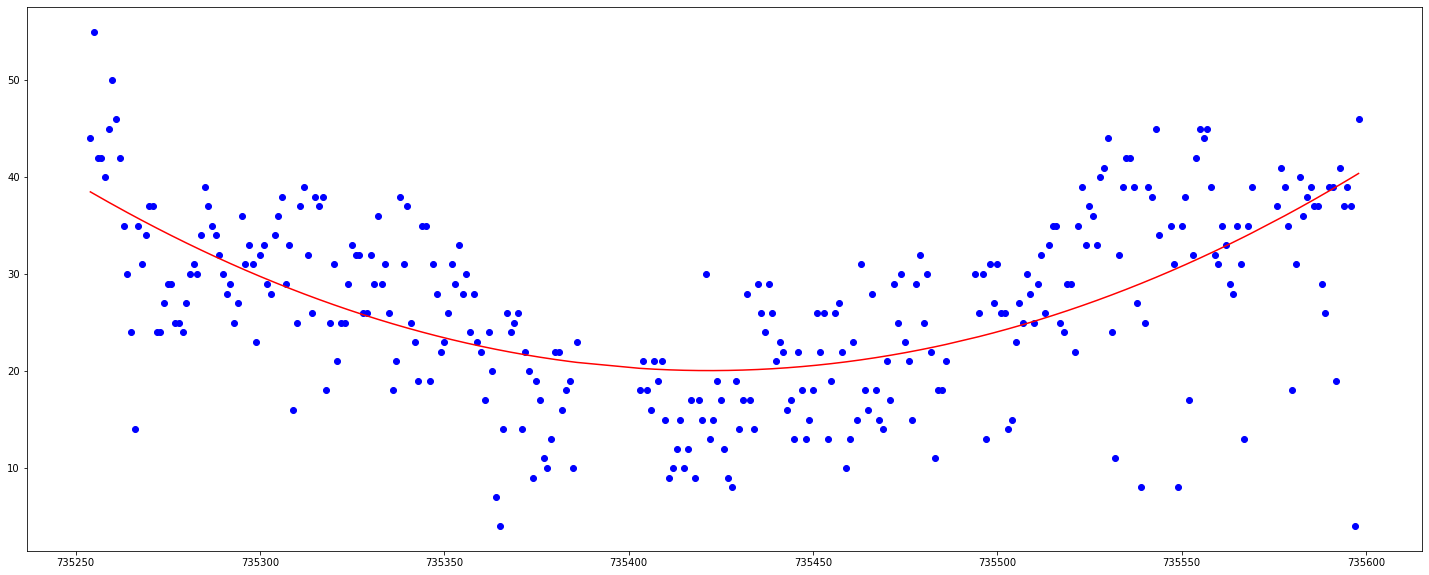

In [80]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color='red')
plt.show()

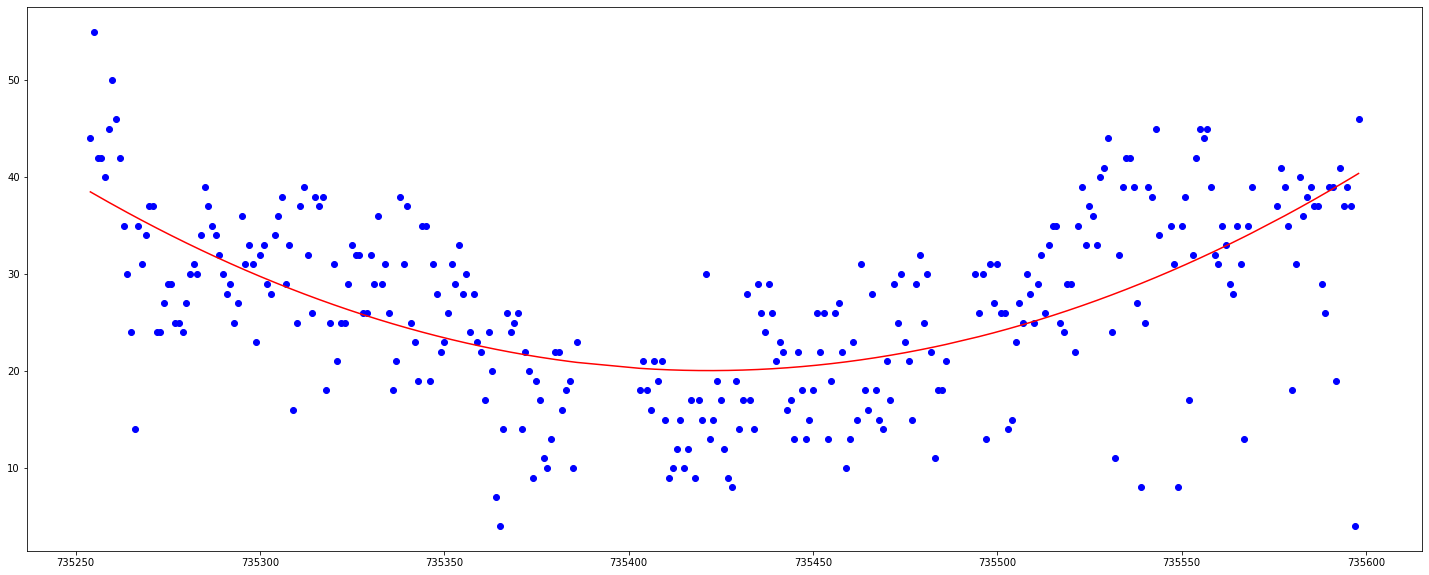

In [60]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color='red')
plt.show()

In [50]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform(x))

In [24]:
poly_pred

array([[25.58009605],
       [25.50657665],
       [25.43330795],
       [25.36028996],
       [25.28752268],
       [25.21500613],
       [25.14274029],
       [25.07072517],
       [24.99896077],
       [24.92744708],
       [24.85618413],
       [24.78517189],
       [24.71441038],
       [24.4338716 ],
       [24.36436373],
       [24.2951066 ],
       [24.2261002 ],
       [24.15734454],
       [24.08883962],
       [24.02058543],
       [23.95258198],
       [23.88482928],
       [23.81732731],
       [23.75007609],
       [23.68307562],
       [23.61632589],
       [23.54982692],
       [23.48357869],
       [23.41758121],
       [23.35183449],
       [23.28633851],
       [23.2210933 ],
       [23.15609883],
       [23.09135513],
       [23.02686219],
       [22.96261999],
       [22.89862858],
       [22.83488793],
       [22.77139803],
       [22.7081589 ],
       [22.64517054],
       [22.58243294],
       [22.51994612],
       [22.45771008],
       [22.3957248 ],
       [22

In [25]:
x

time
0    734503
1    734504
2    734505
3    734506
4    734507
..      ...
694  735229
695  735230
696  735231
697  735232
698  735233

[699 rows x 1 columns]

In [26]:
Uta14 = data14['State'] == 'Utah'
Utah14 = data14[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

In [27]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
Odate = UtahDaily2014['Date Local']
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02, 'Date' : Odate})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)

In [28]:
UtahDaily2014

time  NO2AQI        Date
0   2014-01-21    44.0  2014-01-21
1   2014-01-22    55.0  2014-01-22
2   2014-01-23    42.0  2014-01-23
3   2014-01-24    42.0  2014-01-24
4   2014-01-25    40.0  2014-01-25
..         ...     ...         ...
309 2014-12-27    37.0  2014-12-27
310 2014-12-28    39.0  2014-12-28
311 2014-12-29    37.0  2014-12-29
312 2014-12-30     4.0  2014-12-30
313 2014-12-31    46.0  2014-12-31

[314 rows x 3 columns]

In [29]:
UtahDaily2014['time'] = pd.to_datetime(UtahDaily2014['time'])
UtahDaily2014['time']=UtahDaily2014['time'].map(dt.datetime.toordinal)

In [30]:
UtahDaily2014

time  NO2AQI        Date
0    735254    44.0  2014-01-21
1    735255    55.0  2014-01-22
2    735256    42.0  2014-01-23
3    735257    42.0  2014-01-24
4    735258    40.0  2014-01-25
..      ...     ...         ...
309  735594    37.0  2014-12-27
310  735595    39.0  2014-12-28
311  735596    37.0  2014-12-29
312  735597     4.0  2014-12-30
313  735598    46.0  2014-12-31

[314 rows x 3 columns]

In [31]:
x = UtahDaily2014.iloc[:,0:1]

In [32]:
UtahDaily2014

time  NO2AQI        Date
0    735254    44.0  2014-01-21
1    735255    55.0  2014-01-22
2    735256    42.0  2014-01-23
3    735257    42.0  2014-01-24
4    735258    40.0  2014-01-25
..      ...     ...         ...
309  735594    37.0  2014-12-27
310  735595    39.0  2014-12-28
311  735596    37.0  2014-12-29
312  735597     4.0  2014-12-30
313  735598    46.0  2014-12-31

[314 rows x 3 columns]

In [33]:
UtahDaily2014['Predictions'] =  poly_pred

ValueError: Length of values (699) does not match length of index (314)

In [34]:
UtahDaily2014

time  NO2AQI        Date
0    735254    44.0  2014-01-21
1    735255    55.0  2014-01-22
2    735256    42.0  2014-01-23
3    735257    42.0  2014-01-24
4    735258    40.0  2014-01-25
..      ...     ...         ...
309  735594    37.0  2014-12-27
310  735595    39.0  2014-12-28
311  735596    37.0  2014-12-29
312  735597     4.0  2014-12-30
313  735598    46.0  2014-12-31

[314 rows x 3 columns]

In [35]:
x = UtahDaily2014['time']

In [36]:
y = UtahDaily2014['NO2AQI']

In [37]:
z = UtahDaily2014['Date']

In [38]:
o = UtahDaily2014['Predictions']

KeyError: 'Predictions'

NameError: name 'o' is not defined

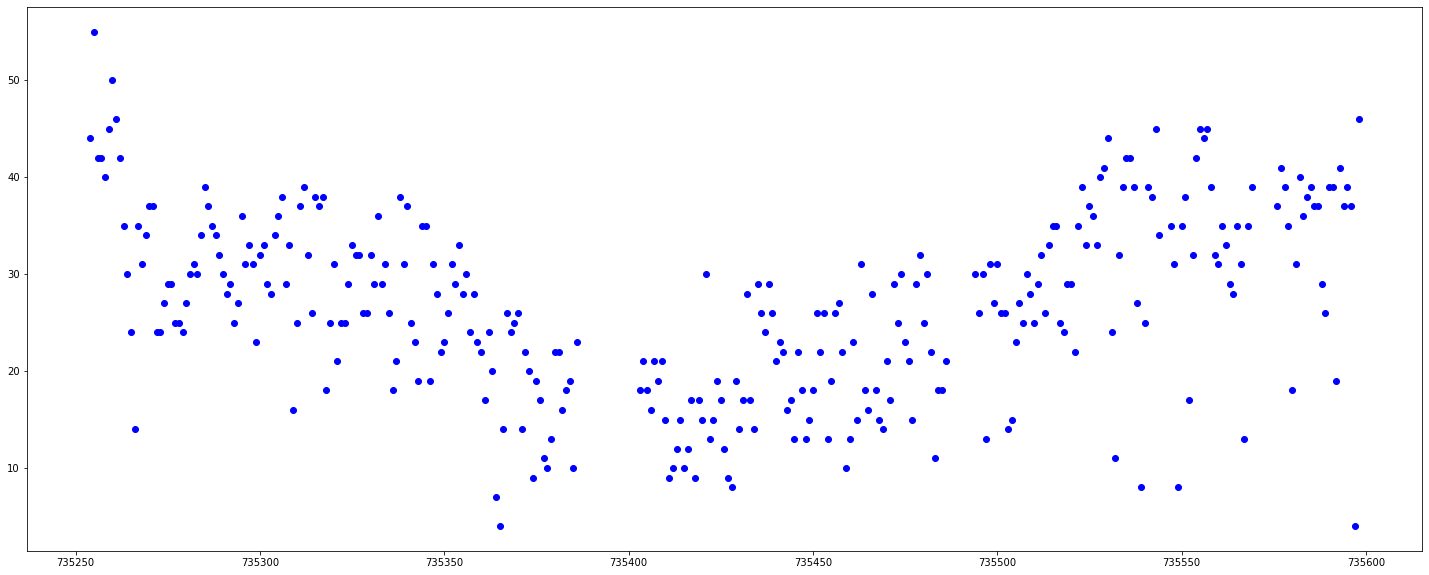

In [39]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.scatter(x,o,color='red')
